<a href="https://colab.research.google.com/github/dileepadrd/project_2/blob/Romain/Ease_of_doing_business_Romain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries** 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
np.random.seed(45)
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

**Import Data**

In [2]:
# Import data to Google Colab
from google.colab import files
uploaded = files.upload()

Saving ease-of-doing-business.csv to ease-of-doing-business (5).csv


**Read Data**

In [3]:
# Read the Ease of Doing Business dataset
df_ease_of_doing_business = pd.read_csv('ease-of-doing-business.csv')

df_ease_of_doing_business.dropna(inplace=True)

# Print the first 5 rows of the Ease of Doing Business dataset
df_ease_of_doing_business.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
227,Albania,ALB,Enforcing contracts: Cost (% of claim),ENF.CONT.COEN.COST.ZS,38.70,38.70,38.70,38.70,38.70,38.70,38.70,35.70,35.70,35.70,35.70,34.90,34.90,34.90,34.90,34.90
228,Albania,ALB,Enforcing contracts: Cost (% of claim) - Score,ENF.CONT.COEN.COST.ZS.DFRN,56.58,56.58,56.58,56.58,56.58,56.58,56.58,59.96,59.96,59.96,59.96,60.85,60.85,60.85,60.85,60.85
242,Albania,ALB,Enforcing contracts: Time (days),ENF.CONT.DURS.DY,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,450.00,525.00,525.00,525.00,525.00,525.00,525.00
243,Albania,ALB,Enforcing contracts: Time (days) - Score,ENF.CONT.DURS.DY.DFRN,77.87,77.87,77.87,77.87,77.87,77.87,77.87,77.87,77.87,72.95,66.80,66.80,66.80,66.80,66.80,66.80
356,Albania,ALB,Resolving insolvency: Cost (% of estate),RESLV.ISV.COST.ZS,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


**Pre-process Data**

In [4]:
df_eodb_t = df_ease_of_doing_business.T.reset_index()
df_eodb_t.columns = df_eodb_t.iloc[0]
df_eodb_t = df_eodb_t[1:]

In [5]:
# Filling in the missing values with 0
df_eodb_t.fillna(0, inplace=True)

# Creating a new column to represent the average Ease of Doing Business ranking for the past 5 years
df_ease_of_doing_business['Average EoDB'] = df_ease_of_doing_business[['2015', '2016', '2017', '2018', '2019']].mean(axis=1)

In [6]:
df_ease_of_doing_business.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Average EoDB'],
      dtype='object')

**Select the top 20 countries based on their average Ease of Doing Business ranking**

In [7]:
# Select the top 20 countries based on their average Ease of Doing Business ranking
top_countries = df_ease_of_doing_business.sort_values('Average EoDB', ascending=False).head(20)
top_country_names = top_countries.iloc[:, 0].tolist()
average_eodb_values = top_countries['Average EoDB'].tolist()

# Create a dataframe with the top 20 countries and their ranks
rank = list(range(1, 21))
df_top_20 = pd.DataFrame({'Rank': rank, 'Country Name': top_country_names, 'Average EoDB': average_eodb_values})
df_top_20 = df_top_20.set_index('Country Name')

# Correct the country names
df_top_20 = df_top_20.rename(index={'Mumbai': 'India', 'Karachi': 'Pakistan'})


df_top_20 = df_top_20[['Rank', 'Average EoDB']]

display('Top 20 Countries with the Highest Average Ease of Doing Business Ranking')
display(df_top_20)

'Top 20 Countries with the Highest Average Ease of Doing Business Ranking'

,Rank,Average EoDB
Country Name,,
Greece,1,1580.0
India,2,1445.0
Dhaka,3,1442.0
Guatemala,4,1402.0
Sri Lanka,5,1318.0
Angola,6,1296.0
Colombia,7,1288.0
Slovenia,8,1182.0
Italy,9,1133.0


**Split, Train and Test**

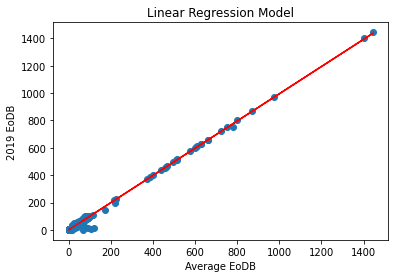

In [8]:
# Split data into training and testing sets
X = df_ease_of_doing_business[['Average EoDB']]
y = df_ease_of_doing_business['2019']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test[['Average EoDB']], y_test)
plt.plot(X_test[['Average EoDB']], y_pred, color='red')
plt.xlabel('Average EoDB')
plt.ylabel('2019 EoDB')
plt.title('Linear Regression Model')

# Save the image
plt.savefig('linear_regression_model.png')

# Display the image
plt.show()

**Calculate Mean Squared and R2 Score**

In [9]:
#Calculate mean squared and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 68.17443604898654
R-squared: 0.9962499909779176


The mean-squared is 68.17 rounded to two decimal points.
The r-squared is 0.996 rounded.

**Split data into training and testing set**s

In [10]:
X = df_ease_of_doing_business[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',       '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Average EoDB']]
y = df_ease_of_doing_business['Average EoDB']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


** Make predictions for the next 10 years**

In [11]:
# Train a linear regression model on the training data
regressor = LinearRegression()
regressor.fit(X_train[['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']], y_train)

# Create X_future DataFrame with country names and years
years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029]
countries = X['Country Name'].unique()
X_future = pd.DataFrame(columns=['Country Name', 'Year', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
for country in countries:
    new_rows = pd.DataFrame({'Country Name': country, 'Year': years, '2004': X.loc[X['Country Name'] == country, '2004'].iloc[0], '2005': X.loc[X['Country Name'] == country, '2005'].iloc[0], '2006': X.loc[X['Country Name'] == country, '2006'].iloc[0], '2007': X.loc[X['Country Name'] == country, '2007'].iloc[0], '2008': X.loc[X['Country Name'] == country, '2008'].iloc[0], '2009': X.loc[X['Country Name'] == country, '2009'].iloc[0], '2010': X.loc[X['Country Name'] == country, '2010'].iloc[0], '2011': X.loc[X['Country Name'] == country, '2011'].iloc[0], '2012': X.loc[X['Country Name'] == country, '2012'].iloc[0], '2013': X.loc[X['Country Name'] == country, '2013'].iloc[0], '2014': X.loc[X['Country Name'] == country, '2014'].iloc[0], '2015': X.loc[X['Country Name'] == country, '2015'].iloc[0], '2016': X.loc[X['Country Name'] == country, '2016'].iloc[0], '2017': X.loc[X['Country Name'] == country, '2017'].iloc[0], '2018': X.loc[X['Country Name'] == country, '2018'].iloc[0], '2019': X.loc[X['Country Name'] == country, '2019'].iloc[0], 'Average EoDB': X.loc[X['Country Name'] == country, 'Average EoDB'].iloc[0]}, index=range(len(years)))
    X_future = pd.concat([X_future, new_rows], ignore_index=True)

# Make predictions for the next 10 years
y_future = regressor.predict(X_future[['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']])
X_future['Predicted EoDB'] = y_future

# Print the results
display(X_future)


,Country Name,Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Average EoDB,Predicted EoDB
0,Albania,2020,38.7,38.7,38.7,38.7,38.7,38.7,38.7,35.7,35.7,35.7,35.7,34.9,34.9,34.9,34.9,34.9,34.9,34.9
1,Albania,2021,38.7,38.7,38.7,38.7,38.7,38.7,38.7,35.7,35.7,35.7,35.7,34.9,34.9,34.9,34.9,34.9,34.9,34.9
2,Albania,2022,38.7,38.7,38.7,38.7,38.7,38.7,38.7,35.7,35.7,35.7,35.7,34.9,34.9,34.9,34.9,34.9,34.9,34.9
3,Albania,2023,38.7,38.7,38.7,38.7,38.7,38.7,38.7,35.7,35.7,35.7,35.7,34.9,34.9,34.9,34.9,34.9,34.9,34.9
4,Albania,2024,38.7,38.7,38.7,38.7,38.7,38.7,38.7,35.7,35.7,35.7,35.7,34.9,34.9,34.9,34.9,34.9,34.9,34.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,Zimbabwe,2025,32.0,32.0,32.0,32.0,32.0,32.0,32.0,113.1,113.1,113.1,83.1,83.1,83.1,83.1,83.1,83.1,83.1,83.1
1446,Zimbabwe,2026,32.0,32.0,32.0,32.0,32.0,32.0,32.0,113.1,113.1,113.1,83.1,83.1,83.1,83.1,83.1,83.1,83.1,83.1
1447,Zimbabwe,2027,32.0,32.0,32.0,32.0,32.0,32.0,32.0,113.1,113.1,113.1,83.1,83.1,83.1,83.1,83.1,83.1,83.1,83.1
1448,Zimbabwe,2028,32.0,32.0,32.0,32.0,32.0,32.0,32.0,113.1,113.1,113.1,83.1,83.1,83.1,83.1,83.1,83.1,83.1,83.1


**Sort and rank the countries based on the predicted Ease of Doing Business**

In [12]:
# Sort the countries based on their predicted EoDB scores and rank them accordingly
X_future = pd.DataFrame({'Country Name': X_test['Country Name'], 'Predicted EoDB': y_pred})
X_future_sorted = X_future.sort_values(by='Predicted EoDB', ascending=False)
X_future_sorted['Rank'] = X_future_sorted['Predicted EoDB'].rank(ascending=False)


# Drop duplicates based on the 'Country Name' column and keep the first occurrence of each country
top_20_countries_with_rank = X_future_sorted.drop_duplicates(subset='Country Name', keep='first').head(20)

# Correct the country names
top_20_countries_with_rank.loc[top_20_countries_with_rank['Country Name'] == 'Mumbai', 'Country Name'] = 'India'

# Print the top 20 countries with their predicted EoDB scores and rank
display(top_20_countries_with_rank[['Country Name', 'Predicted EoDB', 'Rank']])


,Country Name,Predicted EoDB,Rank
26687,India,1437.970892,1.0
14387,Guatemala,1395.188630,2.0
17257,Israel,970.350819,3.0
38167,Syrian Arab Republic,867.872378,4.0
6187,Cameroon,796.236962,5.0
30992,Portugal,774.348363,6.0
3727,Benin,746.490146,7.0
41652,Uruguay,721.616738,8.0
4547,Botswana,656.945876,9.5
19307,Kiribati,656.945876,9.5


In [21]:
import folium

# Create a map object
m = folium.Map(location=[30, 0], zoom_start=2)

# Define a function to add a marker for each country
def add_marker(country, lat, lon, rank):
    tooltip = f"{country}: Rank {int(rank)}"
    folium.Marker(location=[lat, lon], tooltip=tooltip).add_to(m)

# Iterate through the top 20 countries and add a marker for each one
for i, row in top_20_countries_with_rank.iterrows():
    country = row['Country Name']
    rank = row['Rank']
    if country in countries_lat_lon:
        lat, lon = countries_lat_lon[country]
        add_marker(country, lat, lon, rank)

# Adjust the map bounds and zoom level to show all markers
m.fit_bounds(m.get_bounds())

# Display the map
m
